In [21]:
library(reshape2)
library(ggplot2)


In [33]:
# Read into a variable from csv, keeping only columns we care about
poverty <- read.csv("../data/FreeReducedLunch.csv", stringsAsFactors = FALSE)
poverty <- poverty[, c(1, 5, 8, 11, 14, 17)]
# Eliminate incomplete cases
poverty <- poverty[complete.cases(poverty), ]
# head(poverty)
poverty

SchoolID Enrollment Free_Lunches Reduced_Lunches Eligible_Students
3         707        186          100              25               125
4          17         80           39               7                46
5          16         92           65              10                75
7        1210        291          104              27               131
8        1208        353          160              24               184
9        1209        198           92              21               113
10        705         66           48               8                56
11        323        136           67              24                91
15        381        996          289              67               356
16        375        304          107              13               120
17        380        574          212              30               242
18        377        311          110              27               137
19        379        297          158              16               174
20       4476        102           52               8                60
23        146        580          234              40               274
24        144        412          168              47               215
25        147        410          194              39               233
26        143        423          231              31               262
27       1056        198           62              25                87
28       1055        205           89              28               117
29       1053        183           92              19               111
34          8        499          188              35               223
35          1        245          106              26               132
36          4        113           52              17                69
37          7        314          175              37               212
38          2        465          296              30               326
39       3493         27           19               6                25
40        217        254          135              17               152
41        218        229          143              26               169
42        216        240          158              24               182
43       1124        377           80              24               104
44       1123        295           81              27               108
45       1120        434          129              30               159
51       1370        818           39               6                45
52       3437        730           30              11                41
53       4671        664           49               9                58
54       2782       1389          109              28               137
55       1158        339           32               8                40
56       2781        535           56              15                71
57       1156        520           55              17                72
58       1270        504           61              13                74
59       1160        514           68              16                84
60       1171        575           77              19                96
61       4474        869          139              27               166
62       1174        441           69              16                85
63       4712        897          147              26               173
64       1304        726          118              41               159
65       1303        554          107              24               131
66       2783       1666          333              62               395
67       1175        530          106              22               128
68       1188       2072          428              73               501
69       1180       1043          255              27               282
70       1165        692          153              40               193
71       1320       2525          623             108               731
72       1170        358           86        

In [34]:
# Read into a variable from csv, keeping only columns we care about
performance <- read.csv("../data/Performance.csv", stringsAsFactors = FALSE)
performance <- performance[, c(3, 6, 7, 9, 10)]
# Shorten terms, column names
performance$Subject[performance$Subject == "English Language Arts"] <- "Eng"
performance$Subject[performance$Subject == "Mathematics"] <- "Math"
performance$Subject[performance$Subject == "Science"] <- "Sci"
performance$Subgroup[performance$Subgroup == "American Indian/Alaskan Native"] <- "NaAmer"
performance$Subgroup[performance$Subgroup == "Black/African American"] <- "Black"
performance$Subgroup[performance$Subgroup == "Econo. Disadvantaged"] <- "EcoDis"
performance$Subgroup[performance$Subgroup == "Extended Assessment"] <- "ExAsmt"
performance$Subgroup[performance$Subgroup == "Hispanic/Latino"] <- "HisLat"
performance$Subgroup[performance$Subgroup == "Indian Education"] <- "IndEd"
performance$Subgroup[performance$Subgroup == "Limited English Proficient (LEP)"] <- "LimEng"
performance$Subgroup[performance$Subgroup == "Migrant Education"] <- "MigEdu"
performance$Subgroup[performance$Subgroup == "Multi-Racial"] <- "Multi"
performance$Subgroup[performance$Subgroup == "Pacific Islander"] <- "PacIsl"
performance$Subgroup[performance$Subgroup == "Students with Disabilities (SWD)"] <- "SWD" 
performance$Subgroup[performance$Subgroup == "SWD with Accommodations"] <- "SWDAcc" 
performance$Subgroup[performance$Subgroup == "Talented and Gifted (TAG)"] <- "TAG"
performance$Subgroup[performance$Subgroup == "Total Population"] <- "Total"
names(performance)[4:5] <- c("Part", "Met")
performance

SchoolID Subject               Subgroup  Part  Met
1          498     Eng                 EcoDis    NA   NA
2          498     Eng                 Female    NA   NA
3          498     Eng                   Male    NA   NA
4          498     Eng                    SWD    NA   NA
5          498     Eng                    TAG    NA   NA
6          498     Eng                  Total 100.0 42.9
7          498     Eng                  White 100.0 42.9
8          498    Math                 EcoDis    NA   NA
9          498    Math                 Female    NA   NA
10         498    Math                   Male    NA   NA
11         498    Math                    SWD    NA   NA
12         498    Math                    TAG    NA   NA
13         498    Math                  Total 100.0 28.6
14         498    Math                  White 100.0 28.6
15         707     Eng                 NaAmer    NA   NA
16         707     Eng                  Asian    NA   NA
17         707     Eng                 EcoDis 100.0 53.0
18         707     Eng                 Female 100.0 71.7
19         707     Eng                 HisLat 100.0 54.8
20         707     Eng                 LimEng 100.0 37.5
21         707     Eng                   Male 100.0 50.0
22         707     Eng                 MigEdu    NA   NA
23         707     Eng                  Multi    NA   NA
24         707     Eng                    SWD    NA   NA
25         707     Eng                    TAG    NA   NA
26         707     Eng                  Total 100.0 62.5
27         707     Eng                  White 100.0 64.3
28         707    Math                 NaAmer    NA   NA
29         707    Math                  Asian    NA   NA
30         707    Math                 EcoDis 100.0 48.5
31         707    Math                 Female 100.0 61.7
32         707    Math                 HisLat 100.0 48.4
33         707    Math                 LimEng 100.0 12.5
34         707    Math                   Male 100.0 56.8
35         707    Math                 MigEdu    NA   NA
36         707    Math                  Multi    NA   NA
37         707    Math                    SWD    NA   NA
38         707    Math                    TAG    NA   NA
39         707    Math                  Total 100.0 59.6
40         707    Math                  White 100.0 65.7
41         708     Eng                  Asian    NA   NA
42         708     Eng                 EcoDis    NA   NA
43         708     Eng                 Female  88.9 66.7
44         708     Eng                 HisLat    NA   NA
45         708     Eng                 LimEng    NA   NA
46         708     Eng                   Male    NA   NA
47         708     Eng                  Multi    NA   NA
48         708     Eng                    TAG    NA   NA
49         708     Eng                  Total  92.9 81.8
50         708     Eng                  White    NA 95.0
51         708    Math                  Asian    NA   NA
52         708    Math                 EcoDis    NA   NA
53         708    Math                 Female    NA  5.0
54         708    Math                 HisLat    NA   NA
55         708    Math                 LimEng    NA   NA
56         708    Math                   Male    NA   NA
57         708    Math                  Multi    NA   NA
58         708    Math                    TAG    NA   NA
59         708    Math                  Total  85.7 25.0
60         708    Math                  White  88.9 25.0
61          16     Eng                 EcoDis 100.0 20.8
62          16     Eng                 ExAsmt    NA   NA
63          16     Eng                 Female 100.0 33.3
64          16     Eng                 HisLat    NA   NA
65          16     Eng                   Male 100.0 11.1
66          16     Eng                    SWD 100.0 14.3
67          16     Eng                  Total 100.0 23.8
68          16     Eng                  White 100.0 25.6
69          16    Math                 EcoDis  91.7 27.3
70          16  

In [35]:
# Find instances of '> 95.0%' or '< 5.0%' and replace them with '95.0' and '5.0'
performance$Part <- sub("[<>] ([0-9]{1,2}.[0-9])%", "\\1", performance$Part)
performance$Met <- sub("[<>] ([0-9]{1,2}.[0-9])%", "\\1", performance$Met)
# Replace '*' and '-' with NA
performance$Part[performance$Part %in% c("*", "-")] <- NA
performance$Met[performance$Met %in% c("*", "-")] <- NA
# Cast proportionas as numeric, os taht we can do math on them
# (the are read in as strings)
performance$Part <- as.numeric(performance$Part)
performance$Met <- as.numeric(performance$Met)
performance

SchoolID Subject               Subgroup  Part  Met
1          498     Eng                 EcoDis    NA   NA
2          498     Eng                 Female    NA   NA
3          498     Eng                   Male    NA   NA
4          498     Eng                    SWD    NA   NA
5          498     Eng                    TAG    NA   NA
6          498     Eng                  Total 100.0 42.9
7          498     Eng                  White 100.0 42.9
8          498    Math                 EcoDis    NA   NA
9          498    Math                 Female    NA   NA
10         498    Math                   Male    NA   NA
11         498    Math                    SWD    NA   NA
12         498    Math                    TAG    NA   NA
13         498    Math                  Total 100.0 28.6
14         498    Math                  White 100.0 28.6
15         707     Eng                 NaAmer    NA   NA
16         707     Eng                  Asian    NA   NA
17         707     Eng                 EcoDis 100.0 53.0
18         707     Eng                 Female 100.0 71.7
19         707     Eng                 HisLat 100.0 54.8
20         707     Eng                 LimEng 100.0 37.5
21         707     Eng                   Male 100.0 50.0
22         707     Eng                 MigEdu    NA   NA
23         707     Eng                  Multi    NA   NA
24         707     Eng                    SWD    NA   NA
25         707     Eng                    TAG    NA   NA
26         707     Eng                  Total 100.0 62.5
27         707     Eng                  White 100.0 64.3
28         707    Math                 NaAmer    NA   NA
29         707    Math                  Asian    NA   NA
30         707    Math                 EcoDis 100.0 48.5
31         707    Math                 Female 100.0 61.7
32         707    Math                 HisLat 100.0 48.4
33         707    Math                 LimEng 100.0 12.5
34         707    Math                   Male 100.0 56.8
35         707    Math                 MigEdu    NA   NA
36         707    Math                  Multi    NA   NA
37         707    Math                    SWD    NA   NA
38         707    Math                    TAG    NA   NA
39         707    Math                  Total 100.0 59.6
40         707    Math                  White 100.0 65.7
41         708     Eng                  Asian    NA   NA
42         708     Eng                 EcoDis    NA   NA
43         708     Eng                 Female  88.9 66.7
44         708     Eng                 HisLat    NA   NA
45         708     Eng                 LimEng    NA   NA
46         708     Eng                   Male    NA   NA
47         708     Eng                  Multi    NA   NA
48         708     Eng                    TAG    NA   NA
49         708     Eng                  Total  92.9 81.8
50         708     Eng                  White    NA 95.0
51         708    Math                  Asian    NA   NA
52         708    Math                 EcoDis    NA   NA
53         708    Math                 Female    NA  5.0
54         708    Math                 HisLat    NA   NA
55         708    Math                 LimEng    NA   NA
56         708    Math                   Male    NA   NA
57         708    Math                  Multi    NA   NA
58         708    Math                    TAG    NA   NA
59         708    Math                  Total  85.7 25.0
60         708    Math                  White  88.9 25.0
61          16     Eng                 EcoDis 100.0 20.8
62          16     Eng                 ExAsmt    NA   NA
63          16     Eng                 Female 100.0 33.3
64          16     Eng                 HisLat    NA   NA
65          16     Eng                   Male 100.0 11.1
66          16     Eng                    SWD 100.0 14.3
67          16     Eng                  Total 100.0 23.8
68          16     Eng                  White 100.0 25.6
69          16    Math                 EcoDis  91.7 27.3
70          16  

In [36]:
# Reshape into one row per school, one column per Group_Subject_Metric combo
performance <- recast(performance, SchoolID ~ Subgroup + Subject + variable, id.var = 1:3)
performance

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "<e2><8b><b1>"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "<e2><8b><b1>"): invalid factor level, NA generated

SchoolID Asian_Eng_Part Asian_Eng_Met Asian_Math_Part Asian_Math_Met
1           1             NA            NA              NA             NA
2           2             NA            NA              NA             NA
3           4             NA            NA              NA             NA
4           5             NA            NA              NA             NA
5           7             NA            NA              NA             NA
6           8             NA            NA              NA             NA
7          15             NA            NA              NA             NA
8          16             NA            NA              NA             NA
9          17             NA            NA              NA             NA
10         18             NA            NA              NA             NA
11         20             NA            NA              NA             NA
12         21             NA            NA              NA             NA
13         22             NA            NA              NA             NA
14         27          100.0          81.8              NA           95.0
15         28           98.0          87.8           100.0           85.4
16         30             NA            NA              NA             NA
17         33          100.0          79.3           100.0           86.2
18         35          100.0          71.4           100.0           71.4
19         36             NA            NA              NA             NA
20         37             NA            NA              NA             NA
21         38          100.0          85.7           100.0           57.1
22         39          100.0          57.1           100.0           85.7
23         40          100.0          82.4           100.0           70.6
24         41             NA          95.0           100.0           86.4
25         43             NA            NA              NA             NA
26         45             NA            NA              NA             NA
27         46          100.0          85.2           100.0           81.5
28         47          100.0          81.3           100.0           87.5
29         48          100.0          83.3           100.0           83.3
30         51          100.0          80.0            96.7           72.4
31         53          100.0          93.3           100.0           80.0
32         54          100.0          80.0           100.0           80.0
33         55          100.0          93.5              NA           95.0
34         56          100.0          90.0           100.0           90.0
35         58          100.0          80.0           100.0           80.0
36         59           96.8          92.2            97.9           94.5
37         60             NA          95.0           100.0           91.1
38         61           32.5          84.6            30.0           83.3
39         62          100.0          92.9           100.0           71.4
40         65          100.0          61.5           100.0           53.8
41         72             NA            NA              NA             NA
42         73             NA            NA              NA             NA
43         76             NA            NA              NA             NA
44         78          100.0          62.5           100.0           53.1
45         79             NA            NA              NA             NA
46         84           94.1          56.3            94.1           12.5
47         85           94.3          92.7            97.7           76.5
48         86          100.0          33.3           100.0           16.7
49         87             NA            NA              NA             NA
50         88             NA            NA              NA             NA
51         90             NA            NA              NA             NA
52         91             NA            NA              NA             NA
53         92             NA            NA              NA             NA
54       

In [37]:
# subset to overall data, schools that have compete data
overall <- performance[, c(1, 100:105)]
overall <- overall[complete.cases(overall), ]
overall

SchoolID Total_Eng_Part Total_Eng_Met Total_Math_Part Total_Math_Met
1           1           98.4          51.5            98.4           36.4
3           4           98.2          71.4            98.2           60.7
5           7           98.7          40.1            98.7           25.6
6           8           96.2          81.0            95.4           44.8
7          15           99.0          62.6           100.0           51.0
8          16          100.0          23.8            95.2           22.5
9          17           82.6          50.0            80.4           29.7
11         20           97.2          45.7            96.9           49.1
12         21           98.2          64.3            98.2           53.7
13         22           94.1          85.4            94.1           54.2
14         27           99.5          66.5            98.9           66.5
15         28           99.5          74.9            99.8           65.8
16         30           99.4          31.1            99.4           24.6
17         33           95.7          74.9            95.7           73.0
18         35           97.7          67.5            97.1           64.9
19         36           99.4          46.1            98.8           35.5
20         37          100.0          54.1            99.3           46.2
21         38           99.9          66.3            99.1           52.1
22         39           97.0          51.3            97.0           55.1
23         40           95.1          84.6            94.7           53.2
24         41           97.9          90.4            97.4           53.3
26         45           99.4          72.0            99.4           69.5
27         46           99.1          63.7            98.8           52.1
28         47           99.3          78.2            98.9           68.3
29         48          100.0          67.9            98.8           70.0
30         51           97.8          83.0            96.3           61.5
31         53           98.5          86.8            98.2           76.6
32         54          100.0          86.9            99.2           80.7
33         55           98.1          82.6            98.5           78.3
34         56           99.4          77.1            99.4           72.6
36         59           98.9          84.9            98.6           73.6
37         60           98.9          82.2            98.7           66.3
38         61           29.6          70.0            29.6           48.0
39         62           95.4          92.7            94.4           62.9
40         65           97.8          65.6            97.8           45.1
41         72           99.1          28.1            99.1           18.0
42         73           97.5          54.5            98.7           53.8
43         76           99.1          46.1            99.1           37.0
44         78           98.5          58.1            98.2           42.0
45         79           98.0          57.3            97.1           46.2
46         84           98.5          43.1            97.2           21.2
47         85           92.6          87.5            90.1           44.4
48         86           97.3          61.6            98.4           14.6
49         87           98.3          81.0            98.6           43.5
50         88           92.6          51.1            90.5           45.3
51         90           97.5          69.6            97.5           44.3
52         91           94.8          55.9            94.8           55.1
53         92           98.2          53.8            97.8           40.1
54         93           95.7          63.6            95.7           53.4
55         94           98.5          35.7            99.0           39.0
56         95           99.2          47.8            99.0           32.7
57         96           97.8          56.2            97.3           41.6
58         97           99.7          71.6            99.7           57.0
59       

In [38]:
# Merge in poverty data via percent eligible for free/reduced lunches
overall <- merge(poverty[, c(1:2, 6)], overall)
# Remove the 'Total_' before the metrics in the column names
names(overall) <- sub("Total_", "", names(overall))# add school type
# Read in and add school type
types <- read.csv("../data/RCmediaSchoolsAggregate.csv")[, c(4,8)]
overall <- merge(types, overall)
# Reorder the SchoolType factor so that they appear in a natural order
overall$SchoolType <- factor(overall$SchoolType, c("E", "M", "H"))
overall

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "<e2><8b><ae>"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "<e2><8b><ae>"): invalid factor level, NA generated

SchoolID SchoolType Enrollment PercentEligible Eng_Part Eng_Met Math_Part
1          1          M        245           53.88     98.4    51.5      98.4
2          4          E        113           61.06     98.2    71.4      98.2
3          7          E        314           67.52     98.7    40.1      98.7
4          8          H        499           44.69     96.2    81.0      95.4
5         15          H        184           58.15     99.0    62.6     100.0
6         16          E         92           81.52    100.0    23.8      95.2
7         17          H         80           57.50     82.6    50.0      80.4
8         20          E        462           43.72     97.2    45.7      96.9
9         21          M        334           38.02     98.2    64.3      98.2
10        22          H        504           35.12     94.1    85.4      94.1
11        27          E        378           21.43     99.5    66.5      98.9
12        28          M        562           32.21     99.5    74.9      99.8
13        30          E        419           71.84     99.4    31.1      99.4
14        33          E        414           15.46     95.7    74.9      95.7
15        35          E        338           26.04     97.7    67.5      97.1
16        36          E        385           61.56     99.4    46.1      98.8
17        37          E        322           46.89    100.0    54.1      99.3
18        38          M        712           42.98     99.9    66.3      99.1
19        39          E        343           50.44     97.0    51.3      97.0
20        40          H       1279           33.15     95.1    84.6      94.7
21        41          H       1014           25.74     97.9    90.4      97.4
22        45          E        288           15.28     99.4    72.0      99.4
23        46          M        749           33.64     99.1    63.7      98.8
24        47          E        515           13.59     99.3    78.2      98.9
25        48          E        297           27.61    100.0    67.9      98.8
26        51          H       1647           12.14     97.8    83.0      96.3
27        54          E        455            9.23    100.0    86.9      99.2
28        55          E        465           10.54     98.1    82.6      98.5
29        56          E        416           22.36     99.4    77.1      99.4
30        59          M        889           11.14     98.9    84.9      98.6
31        60          M        775           11.61     98.9    82.2      98.7
32        61          H       1289            7.99     29.6    70.0      29.6
33        62          H       1132           11.31     95.4    92.7      94.4
34        65          E        454           56.17     97.8    65.6      97.8
35        72          E        449           86.64     99.1    28.1      99.1
36        73          E        154           47.40     97.5    54.5      98.7
37        76          E        448           58.93     99.1    46.1      99.1
38        78          E        540           39.07     98.5    58.1      98.2
39        79          E        422           41.00     98.0    57.3      97.1
40        84          M        897           71.24     98.5    43.1      97.2
41        85          H       2465           24.34     92.6    87.5      90.1
42        86          H       1076           77.60     97.3    61.6      98.4
43        87          H       1148           45.91     98.3    81.0      98.6
44        88          E        208           50.00     92.6    51.1      90.5
45        90          M        166           33.73     97.5    69.6      97.5
46        91          E        239           36.82     94.8    55.9      94.8
47        92          E        393           43.00     98.2    53.8      97.8
48        93          E        163           38.04     95.7    63.6      95.7
49        94          E        447           73.60     98.5    35.7      99.0
50        95          M        504           63.89     99.2    47.8      99.0
51        96          E   

In [39]:
# fit new linear models, dependent on school type
fit_eng <- lm(Eng_Met ~ PercentEligible * SchoolType, data = overall, weights = Enrollment)
fit_math <- lm(Math_Met ~ PercentEligible * SchoolType, data = overall, weights = Enrollment)
fit_sci <- lm(Sci_Met ~ PercentEligible * SchoolType, data = overall, weights = Enrollment)
# Compute how far removed each school's performaces are relative to
# the expectations of the above models (residual performance)
overall$ResEng <- overall$Eng_Met - predict(fit_eng, overall)
overall$ResMath <- overall$Math_Met - predict(fit_math, overall)
overall$ResSci <- overall$Sci_Met - predict(fit_sci, overall)
overall

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "<e2><8b><ae>"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "<e2><8b><ae>"): invalid factor level, NA generated

SchoolID SchoolType Enrollment PercentEligible Eng_Part Eng_Met Math_Part
1          1          M        245           53.88     98.4    51.5      98.4
2          4          E        113           61.06     98.2    71.4      98.2
3          7          E        314           67.52     98.7    40.1      98.7
4          8          H        499           44.69     96.2    81.0      95.4
5         15          H        184           58.15     99.0    62.6     100.0
6         16          E         92           81.52    100.0    23.8      95.2
7         17          H         80           57.50     82.6    50.0      80.4
8         20          E        462           43.72     97.2    45.7      96.9
9         21          M        334           38.02     98.2    64.3      98.2
10        22          H        504           35.12     94.1    85.4      94.1
11        27          E        378           21.43     99.5    66.5      98.9
12        28          M        562           32.21     99.5    74.9      99.8
13        30          E        419           71.84     99.4    31.1      99.4
14        33          E        414           15.46     95.7    74.9      95.7
15        35          E        338           26.04     97.7    67.5      97.1
16        36          E        385           61.56     99.4    46.1      98.8
17        37          E        322           46.89    100.0    54.1      99.3
18        38          M        712           42.98     99.9    66.3      99.1
19        39          E        343           50.44     97.0    51.3      97.0
20        40          H       1279           33.15     95.1    84.6      94.7
21        41          H       1014           25.74     97.9    90.4      97.4
22        45          E        288           15.28     99.4    72.0      99.4
23        46          M        749           33.64     99.1    63.7      98.8
24        47          E        515           13.59     99.3    78.2      98.9
25        48          E        297           27.61    100.0    67.9      98.8
26        51          H       1647           12.14     97.8    83.0      96.3
27        54          E        455            9.23    100.0    86.9      99.2
28        55          E        465           10.54     98.1    82.6      98.5
29        56          E        416           22.36     99.4    77.1      99.4
30        59          M        889           11.14     98.9    84.9      98.6
31        60          M        775           11.61     98.9    82.2      98.7
32        61          H       1289            7.99     29.6    70.0      29.6
33        62          H       1132           11.31     95.4    92.7      94.4
34        65          E        454           56.17     97.8    65.6      97.8
35        72          E        449           86.64     99.1    28.1      99.1
36        73          E        154           47.40     97.5    54.5      98.7
37        76          E        448           58.93     99.1    46.1      99.1
38        78          E        540           39.07     98.5    58.1      98.2
39        79          E        422           41.00     98.0    57.3      97.1
40        84          M        897           71.24     98.5    43.1      97.2
41        85          H       2465           24.34     92.6    87.5      90.1
42        86          H       1076           77.60     97.3    61.6      98.4
43        87          H       1148           45.91     98.3    81.0      98.6
44        88          E        208           50.00     92.6    51.1      90.5
45        90          M        166           33.73     97.5    69.6      97.5
46        91          E        239           36.82     94.8    55.9      94.8
47        92          E        393           43.00     98.2    53.8      97.8
48        93          E        163           38.04     95.7    63.6      95.7
49        94          E        447           73.60     98.5    35.7      99.0
50        95          M        504           63.89     99.2    47.8      99.0
51        96          E   

In [40]:
# Read in the programs list
programs <- read.csv("../data/OASK_DB.csv")
# Simce the only thing we need for this analysis is a count of how many
# programs exist at each school, we simply count how many times each
# SchoolID appears in this list.
# This line grabs the SchoolID column in every row where SchoolID isn't NA.
programs <- programs[!is.na(programs$SchoolID), 1]
# The table function is a quick way to count what's in a vector.
programs <- as.data.frame(table(programs))
# Rename the columns
names(programs) <- c("SchoolID", "Programs")
programs

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "<e2><8b><ae>"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "<e2><8b><ae>"): invalid factor level, NA generated

SchoolID Programs
1           1        2
2           2        2
3           4        1
4           5        1
5           7        2
6           8        1
7          15        1
8          16        1
9          17        1
10         18        1
11         20        2
12         21        1
13         22        1
14         27        4
15         28        1
16         30        2
17         33        1
18         35        2
19         36        2
20         37        1
21         38        1
22         39        3
23         40        1
24         41        1
25         42        1
26         43        1
27         45        2
28         46        1
29         47        1
30         48        2
31         51        1
32         53        3
33         54        2
34         55        3
35         56        5
36         58        3
37         59        2
38         61        1
39         62        1
40         65        2
41         72        2
42         73        3
43         76        1
44         79        1
45         84        1
46         85        1
47         86        1
48         87        1
49         88        1
50         90        1
51         91        2
52         92        1
53         93        1
54         94        3
55         95        1
56         96        1
57         97        1
58         99        2
59        100        3
60        101        1
61        102        2
62        103        1
63        104        1
64        105        1
65        106        1
66        107        1
67        109        2
68        110        1
69        114        1
70        115        1
71        116        1
72        118        1
73        119        1
74        121        1
75        122        1
76        124        1
77        127        1
78        128        1
79        130        1
80        131        1
81        134        1
82        135        1
83        136        2
84        137        2
85        138        1
86        139        1
87        140        1
88        141        1
89        142        1
90        143        3
91        144        1
92        146        1
93        147        1
94        150        1
95        152        1
96        154        1
97        156        2
98        157        1
99        158        1
100       159        1
101       160        1
102       161        1
103       162        1
104       163        1
105       166        1
106       168        1
107       169        1
108       171        1
109       174        1
110       176        1
111       178        1
112       182        1
113       184        1
114       185        1
115       191        1
116       192        3
117       196        3
118       197        1
119       199        1
120       201        1
121       204        3
122       205        2
123       208        1
124       209        1
125       210        1
126       211        1
127       214        1
128       215        1
129       216        1
130       217        1
131       218        1
132       219        1
133       221        1
134       222        1
135       223        1
136       224        1
137       225        1
138       228        1
139       229        1
140       231        1
141       235        1
142       236        1
143       237        1
144       239        1
145       241        2
146       242        1
147       245        3
148       246        3
149       247        2
150       249        2
151       250        1
152       251        1
153       252        1
154       253        1
155       256        1
156       258        2
157       259        2
158       260        2
159       261        1
160       262        3
161       263        1
162       264        2
163       266        1
164       267        1
165       268        1
166       269        1
167       270        4
168       271        3
169       272        1
170       273        1
171       274        1
172       276        1
173       278        1
174

In [41]:
# Add the counts to the data set we've collected
overall <- merge(overall, programs, all.x = TRUE)
# If a school didn't have a program in the file, we change the NA to a 0
overall$Programs[is.na(overall$Programs)] <- 0
# To keep things simple, we collapse all non-zero counts down to '1+'
overall$Programs[overall$Programs >= 1] <- "1+"
overall$Programs <- as.factor(overall$Programs)
overall

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "<e2><8b><ae>"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "<e2><8b><ae>"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "<e2><8b><ae>"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "<e2><8b><ae>"): invalid factor level, NA generated

SchoolID SchoolType Enrollment PercentEligible Eng_Part Eng_Met Math_Part
1          1          M        245           53.88     98.4    51.5      98.4
2          4          E        113           61.06     98.2    71.4      98.2
3          7          E        314           67.52     98.7    40.1      98.7
4          8          H        499           44.69     96.2    81.0      95.4
5         15          H        184           58.15     99.0    62.6     100.0
6         16          E         92           81.52    100.0    23.8      95.2
7         17          H         80           57.50     82.6    50.0      80.4
8         20          E        462           43.72     97.2    45.7      96.9
9         21          M        334           38.02     98.2    64.3      98.2
10        22          H        504           35.12     94.1    85.4      94.1
11        27          E        378           21.43     99.5    66.5      98.9
12        28          M        562           32.21     99.5    74.9      99.8
13        30          E        419           71.84     99.4    31.1      99.4
14        33          E        414           15.46     95.7    74.9      95.7
15        35          E        338           26.04     97.7    67.5      97.1
16        36          E        385           61.56     99.4    46.1      98.8
17        37          E        322           46.89    100.0    54.1      99.3
18        38          M        712           42.98     99.9    66.3      99.1
19        39          E        343           50.44     97.0    51.3      97.0
20        40          H       1279           33.15     95.1    84.6      94.7
21        41          H       1014           25.74     97.9    90.4      97.4
22        45          E        288           15.28     99.4    72.0      99.4
23        46          M        749           33.64     99.1    63.7      98.8
24        47          E        515           13.59     99.3    78.2      98.9
25        48          E        297           27.61    100.0    67.9      98.8
26        51          H       1647           12.14     97.8    83.0      96.3
27        54          E        455            9.23    100.0    86.9      99.2
28        55          E        465           10.54     98.1    82.6      98.5
29        56          E        416           22.36     99.4    77.1      99.4
30        59          M        889           11.14     98.9    84.9      98.6
31        60          M        775           11.61     98.9    82.2      98.7
32        61          H       1289            7.99     29.6    70.0      29.6
33        62          H       1132           11.31     95.4    92.7      94.4
34        65          E        454           56.17     97.8    65.6      97.8
35        72          E        449           86.64     99.1    28.1      99.1
36        73          E        154           47.40     97.5    54.5      98.7
37        76          E        448           58.93     99.1    46.1      99.1
38        78          E        540           39.07     98.5    58.1      98.2
39        79          E        422           41.00     98.0    57.3      97.1
40        84          M        897           71.24     98.5    43.1      97.2
41        85          H       2465           24.34     92.6    87.5      90.1
42        86          H       1076           77.60     97.3    61.6      98.4
43        87          H       1148           45.91     98.3    81.0      98.6
44        88          E        208           50.00     92.6    51.1      90.5
45        90          M        166           33.73     97.5    69.6      97.5
46        91          E        239           36.82     94.8    55.9      94.8
47        92          E        393           43.00     98.2    53.8      97.8
48        93          E        163           38.04     95.7    63.6      95.7
49        94          E        447           73.60     98.5    35.7      99.0
50        95          M        504           63.89     99.2    47.8      99.0
51        96          E   

In [42]:
# Compute the mean residual performance in each subject, grouped by
# SchoolType and whether or not the school hosts a program
agg_eng <- aggregate(ResEng ~ SchoolType + Programs, data = overall, FUN = mean)
agg_math <- aggregate(ResMath ~ SchoolType + Programs, data = overall, FUN = mean)
agg_sci <- aggregate(ResSci ~ SchoolType + Programs, data = overall, FUN = mean)
# Put all the means back into one data frame
agg <- merge(agg_eng, agg_math)
agg <- merge(agg, agg_sci)
# Instead of one row for each subject, we collect the means
# into separate columns so that each school is a row
agg <- melt(agg, id.vars = 1:2, variable.name = "Subject")
agg

SchoolType Programs Subject       value
1           E        0  ResEng -1.61387608
2           E       1+  ResEng  0.14665768
3           H        0  ResEng -5.93497924
4           H       1+  ResEng -2.61343418
5           M        0  ResEng -2.32654490
6           M       1+  ResEng -0.79211913
7           E        0 ResMath -3.24836590
8           E       1+ ResMath -0.01714031
9           H        0 ResMath  0.53612332
10          H       1+ ResMath -0.43321296
11          M        0 ResMath -1.27468649
12          M       1+ ResMath -1.15798834
13          E        0  ResSci -1.57259875
14          E       1+  ResSci  0.87828071
15          H        0  ResSci -8.14402576
16          H       1+  ResSci -0.28420326
17          M        0  ResSci -2.59743384
18          M       1+  ResSci  0.50310917

In [43]:
# Human-readable labels
levels(agg$SchoolType) = c("Elementary", "Middle", "High")
levels(agg$Subject) <- c("English", "Math", "Science")
agg

SchoolType Programs Subject       value
1  Elementary        0 English -1.61387608
2  Elementary       1+ English  0.14665768
3        High        0 English -5.93497924
4        High       1+ English -2.61343418
5      Middle        0 English -2.32654490
6      Middle       1+ English -0.79211913
7  Elementary        0    Math -3.24836590
8  Elementary       1+    Math -0.01714031
9        High        0    Math  0.53612332
10       High       1+    Math -0.43321296
11     Middle        0    Math -1.27468649
12     Middle       1+    Math -1.15798834
13 Elementary        0 Science -1.57259875
14 Elementary       1+ Science  0.87828071
15       High        0 Science -8.14402576
16       High       1+ Science -0.28420326
17     Middle        0 Science -2.59743384
18     Middle       1+ Science  0.50310917

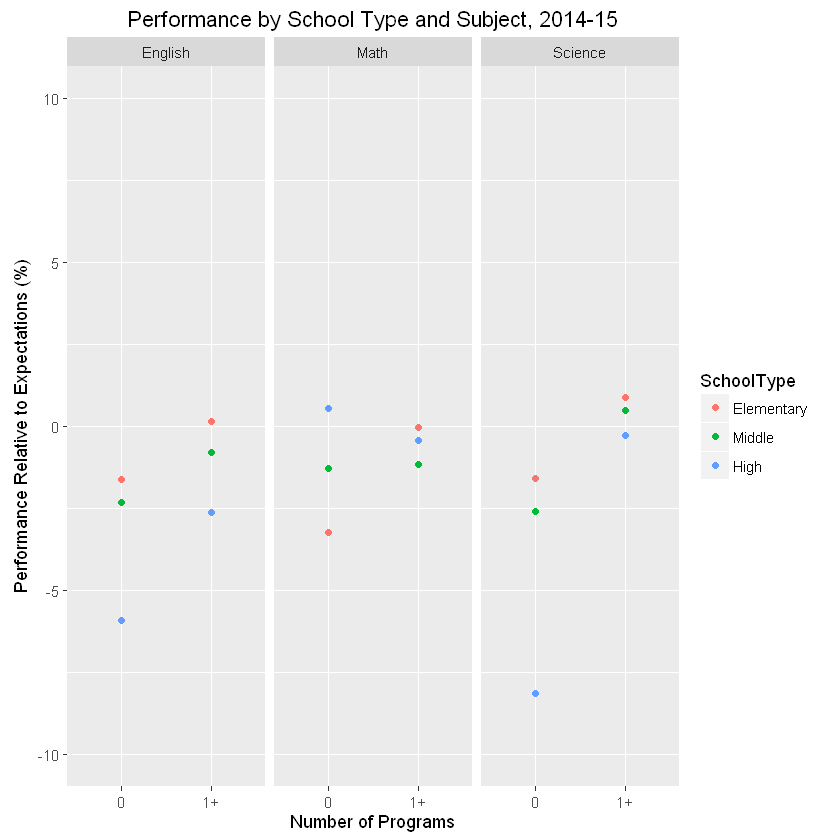

In [44]:
# These commands generate a plot.  As they're all basically the same,
# we'll just go through this one and update when new methods are used.
# We first define the data set and assign variables to columns
g <- ggplot(data = agg, aes(x = Programs, y = value, group = 1))
# Next we plot a point for each class of school, colored by SchoolType
g <- g + geom_point(aes(color = SchoolType))
# We break the figure into three, one for each Subject
g <- g + facet_grid(. ~ Subject)
# Force symmetric axes
g <- g + ylim(-10, 10)
# Add x- and y-axis labels and a title
g <- g + ylab("Performance Relative to Expectations (%)")
g <- g + xlab("Number of Programs")
g <- g + ggtitle("Performance by School Type and Subject, 2014-15")
g


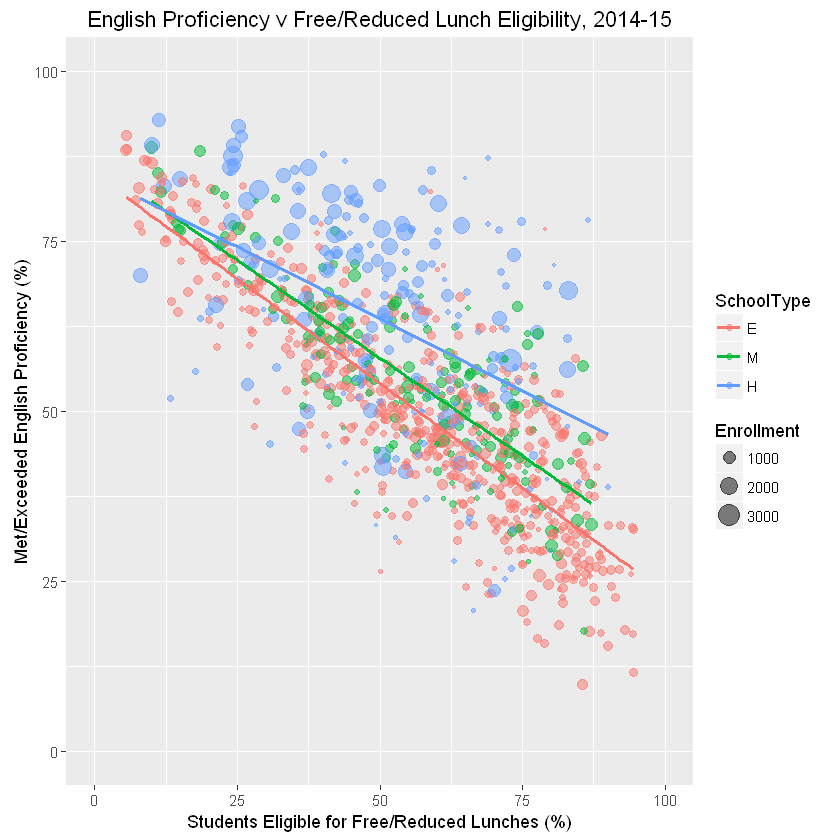

In [45]:
p <- ggplot(overall, aes(x = PercentEligible, y = Eng_Met))
# Alpha affect the points' opacity; we also size each dot by Enrollment
p <- p + geom_point(alpha = 0.5, aes(size = Enrollment, color = SchoolType))
# We want size to scale with area, so that a school twice as big looks so
p <- p + scale_size_area()
p <- p + xlim(0, 100) + ylim(0, 100)
# We add lines of best fit, one for each SchoolType
p <- p + geom_smooth(method = lm, se = FALSE, aes(color = SchoolType))
p <- p + xlab("Students Eligible for Free/Reduced Lunches (%)")
p <- p + ylab("Met/Exceeded English Proficiency (%)")
p <- p + ggtitle("English Proficiency v Free/Reduced Lunch Eligibility, 2014-15")
p


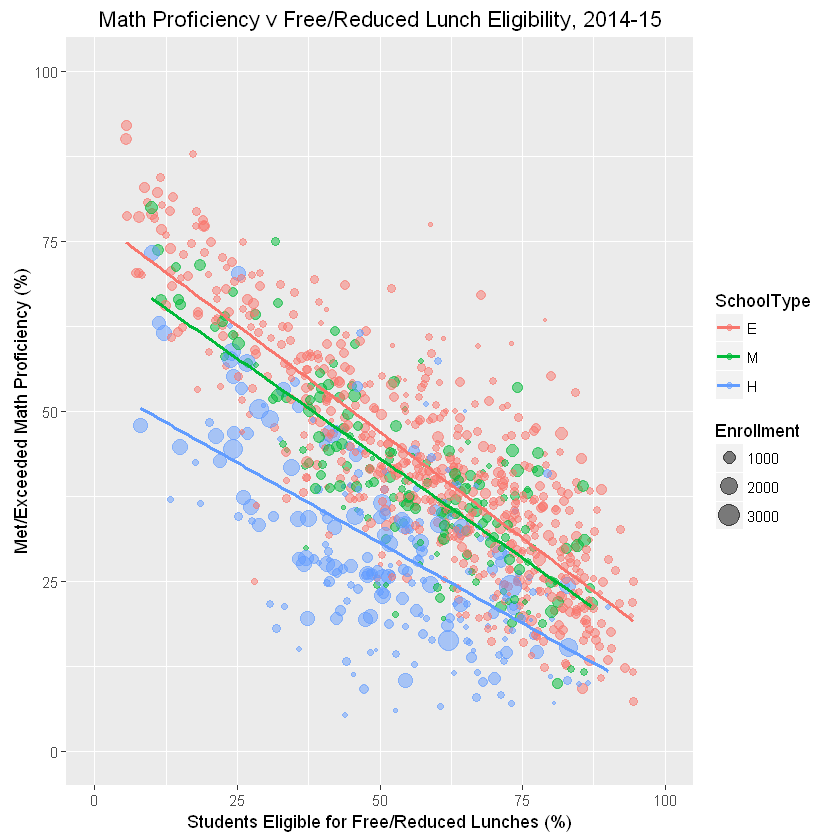

In [14]:
p <- ggplot(overall, aes(x = PercentEligible, y = Math_Met))
p <- p + geom_point(alpha = 0.5, aes(size = Enrollment, color = SchoolType))
p <- p + scale_size_area()
p <- p + xlim(0, 100) + ylim(0, 100)
p <- p + geom_smooth(method = lm, se = FALSE, aes(color = SchoolType))
p <- p + xlab("Students Eligible for Free/Reduced Lunches (%)")
p <- p + ylab("Met/Exceeded Math Proficiency (%)")
p <- p + ggtitle("Math Proficiency v Free/Reduced Lunch Eligibility, 2014-15")
p


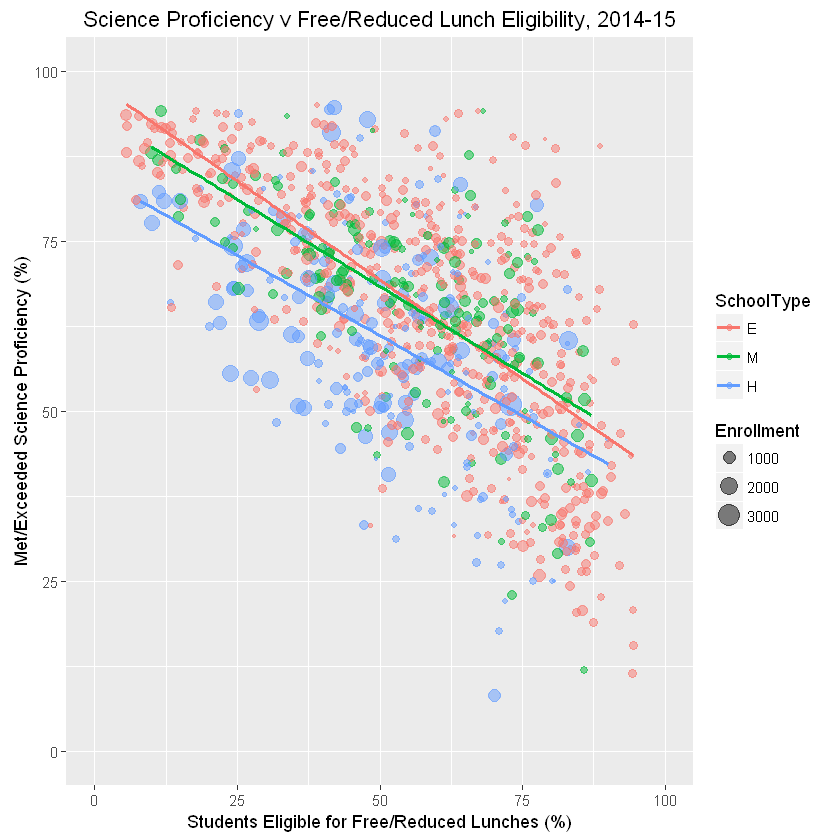

In [15]:
p <- ggplot(overall, aes(x = PercentEligible, y = Sci_Met))
p <- p + geom_point(alpha = 0.5, aes(size = Enrollment, color = SchoolType))
p <- p + scale_size_area()
p <- p + xlim(0, 100) + ylim(0, 100)
p <- p + geom_smooth(method = lm, se = FALSE, aes(color = SchoolType))
p <- p + xlab("Students Eligible for Free/Reduced Lunches (%)")
p <- p + ylab("Met/Exceeded Science Proficiency (%)")
p <- p + ggtitle("Science Proficiency v Free/Reduced Lunch Eligibility, 2014-15")
p


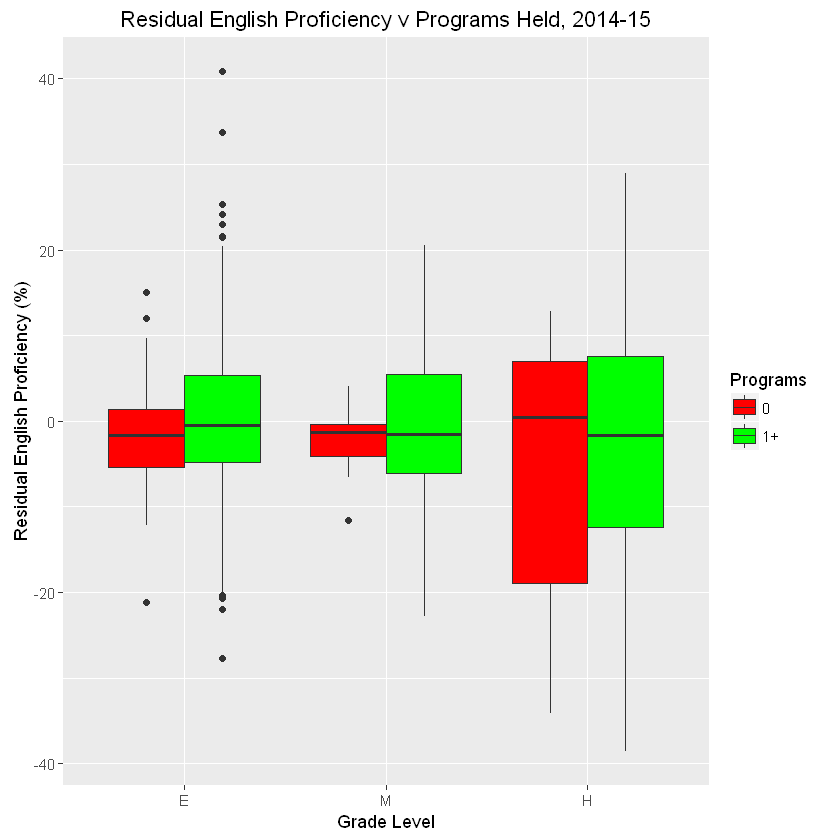

In [16]:
# To give a fuller picture of the distribution of the residual performance
# data, we use box-and-whisker plots.
p <- ggplot(overall, aes(x = SchoolType, y = ResEng))
# Make box-and-whisker plots, coloring the boxes by existance of Programming
p <- p + geom_boxplot(aes(fill = Programs))
# Override the default color choices
p <- p + scale_fill_manual(values = c("red", "green"))
p <- p + xlab("Grade Level")
p <- p + ylab("Residual English Proficiency (%)")
p <- p + ggtitle("Residual English Proficiency v Programs Held, 2014-15")
p


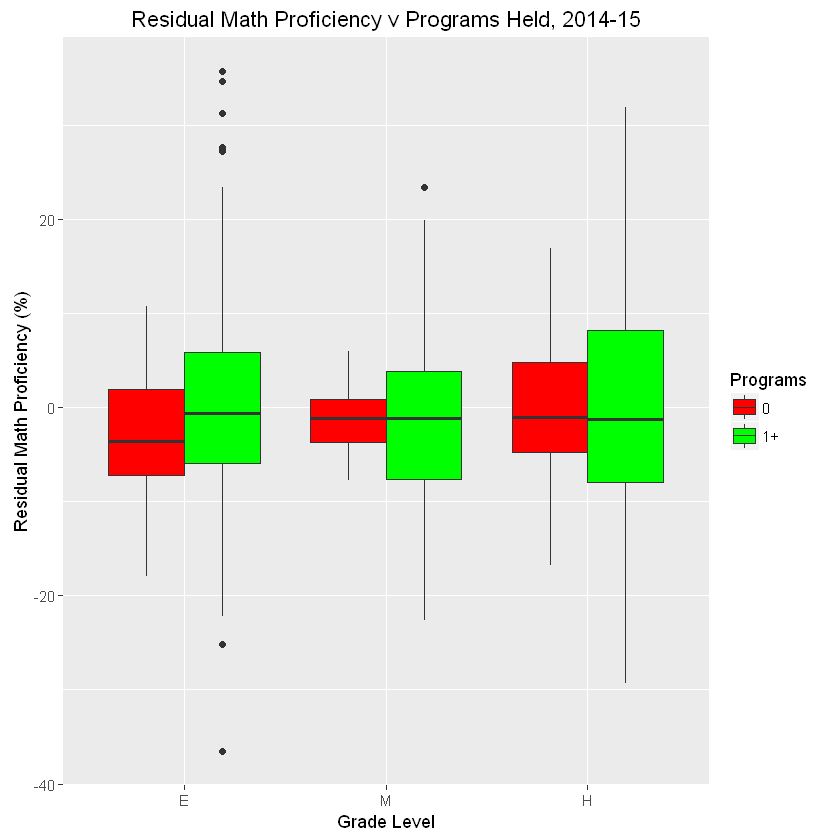

In [17]:
p <- ggplot(overall, aes(x = SchoolType, y = ResMath))
p <- p + geom_boxplot(aes(fill = Programs))
p <- p + scale_fill_manual(values = c("red", "green"))
p <- p + xlab("Grade Level")
p <- p + ylab("Residual Math Proficiency (%)")
p <- p + ggtitle("Residual Math Proficiency v Programs Held, 2014-15")
p


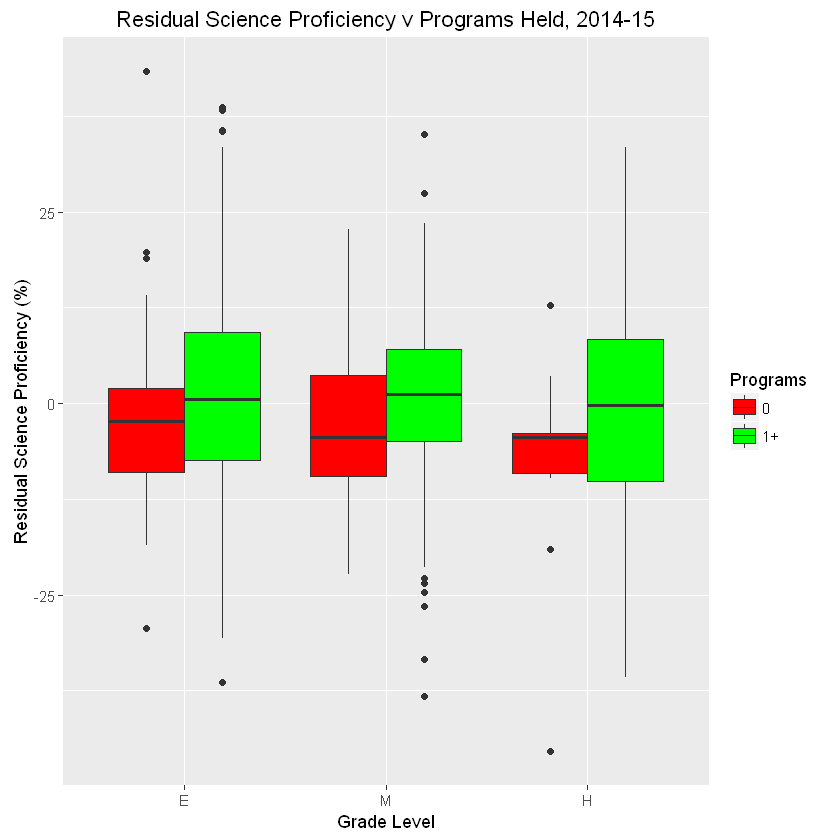

In [18]:
p <- ggplot(overall, aes(x = SchoolType, y = ResSci))
p <- p + geom_boxplot(aes(fill = Programs))
p <- p + scale_fill_manual(values = c("red", "green"))
p <- p + xlab("Grade Level")
p <- p + ylab("Residual Science Proficiency (%)")
p <- p + ggtitle("Residual Science Proficiency v Programs Held, 2014-15")
p
